In [1]:
!git clone https://github.com/hungpham13/Distributed-data-discretization
%cd Distributed-data-discretization/
!pip install -r requirements.txt

Cloning into 'Distributed-data-discretization'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 23 (delta 10), reused 7 (delta 3), pack-reused 0
Unpacking objects: 100% (23/23), done.
/content/Distributed-data-discretization


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# data_true = pd.read_csv('2021D1.csv')
# data_false = pd.read_csv('OtherD1.csv')

In [ ]:
# data_true['Label'] = 0
# data_false['Label'] = 1
# data = pd.concat([data_true,data_false], ignore_index=True)
# data = data.drop(columns='Unnamed: 0')
# data = data.sample(frac=1, ignore_index=True)

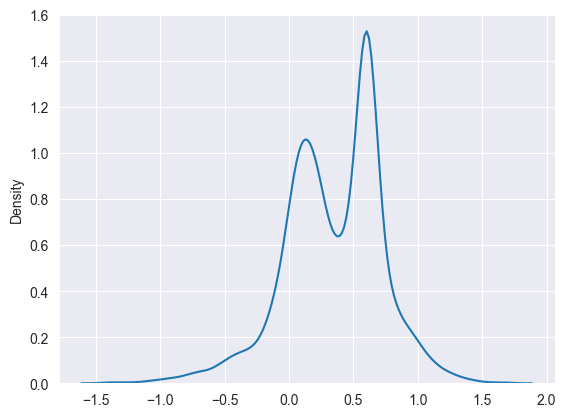

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,Label
0,0.165951,0.516405,0.575093,0.142540,0.572121,0.021885,0.664412,1.023094,0.325685,0.123079,...,0.596703,-0.188158,0.114075,0.496639,-0.261940,1.249669,-0.222576,-0.388939,-0.065350,0
1,0.773065,0.803924,1.088833,0.212949,0.224773,0.745474,0.163273,0.377033,0.468008,0.871209,...,0.274970,-0.341705,0.235526,0.541143,0.175684,0.765143,0.356686,-0.277183,-0.042362,0
2,0.354040,0.479408,0.571562,0.749641,0.283797,1.090723,0.755926,0.387987,0.891272,-0.048575,...,-0.493285,-0.518037,-0.865927,0.321761,-0.286300,0.099121,-0.342990,0.423914,-0.245600,0
3,0.684439,0.161781,0.530195,0.800153,0.411052,0.310079,0.272295,0.679413,0.593943,0.251158,...,1.070848,-0.465919,-0.807959,-0.404868,-0.169360,-0.194338,0.134770,-0.481299,0.099359,0
4,1.119821,0.579202,0.169109,0.691902,0.005870,0.701678,0.096799,0.255701,0.333389,0.266338,...,-0.675027,0.119417,0.601389,-0.063707,-0.019917,-0.296078,-0.240106,0.324253,0.301133,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.049703,0.368378,-0.168333,0.155868,1.282157,0.684084,-0.101059,0.076657,-0.024997,0.518815,...,0.296278,-0.115527,-0.136824,0.372547,-0.040511,-0.619218,1.037957,0.996753,-0.339921,1
496,0.078495,0.324620,-0.278969,1.077193,0.404572,0.559211,0.615610,0.200326,0.348310,0.539021,...,-0.128790,0.357793,0.160487,-0.351067,-0.786701,-0.178281,-0.058874,0.302786,0.114232,0
497,0.458792,0.967142,0.700306,0.423711,0.885058,0.416254,0.524354,0.631403,0.522236,0.366934,...,0.744318,0.887985,-0.181425,1.104102,0.052722,0.815075,-0.519986,0.218398,0.324213,0
498,0.145084,0.684188,0.060941,0.241982,0.732961,0.511650,0.435511,0.197842,0.667061,0.174737,...,0.677045,-0.139232,0.523313,-0.173585,0.500891,-0.062557,-0.116451,-0.514231,0.337912,0


In [2]:
# data = pd.read_csv('data.csv')
# data = data.drop(columns='Unnamed: 0')
# data
from data.gen_data import generate_data
train, test = generate_data(num_train=500, num_test=200, true_ratio=0.9, visualize=False, num_sample=10000, bin_num=5)
train

In [3]:
from psi import calculate_psi
from psi import get_breakpoint

In [6]:
psi_list = []
false_index = []
predict = []
label = []
data_distribution = train.drop(columns=['Label'])
breakpoints = get_breakpoint(data_distribution.to_numpy().reshape(-1), buckettype='bins', buckets=10)

for i in range(len(test)-1):
    psi = calculate_psi(expected=test.loc[i], actual=test.loc[i+1], breakpoints=breakpoints)
    psi_list.append(psi)
    label.append(test['Label'].loc[i] | test['Label'].loc[i+1])
    if psi > 0.1:
        predict.append(1)
        false_index.append(i)
    else: 
        predict.append(0)

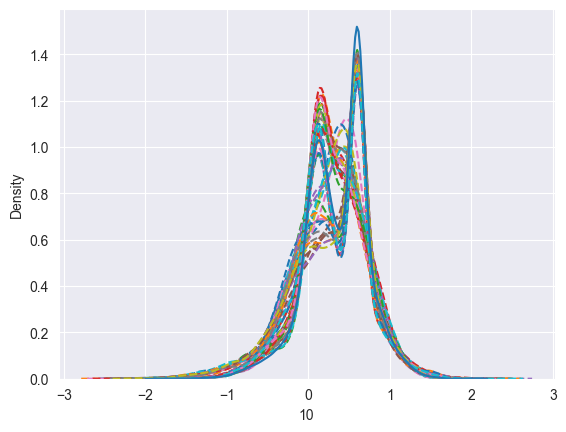

In [4]:
df = pd.concat([train[train.Label==1].iloc[:50], train[train.Label==0].iloc[:1]])

for i, row in df.iterrows():
    sns.kdeplot(row, linestyle= '--' if row.Label==1 else '-')


In [7]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(label, predict))
print(classification_report(label, predict))


[[160   0]
 [ 27  12]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       160
           1       1.00      0.31      0.47        39

    accuracy                           0.86       199
   macro avg       0.93      0.65      0.70       199
weighted avg       0.88      0.86      0.83       199



In [ ]:
Truth_False_index = []
for i in range(699):
    if data['Label'].loc[i]|data['Label'].loc[i+1] == 1:
        Truth_False_index.append(i)

In [ ]:
True_predict = list(set(Truth_False_index) & set(false_index))
True_predict.sort()
True_predict

[0,
 6,
 8,
 15,
 16,
 22,
 23,
 32,
 33,
 54,
 55,
 90,
 91,
 104,
 105,
 110,
 111,
 123,
 124,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 150,
 151,
 168,
 169,
 188,
 189,
 207,
 208,
 220,
 221,
 222,
 228,
 229,
 238,
 239,
 240,
 253,
 254,
 263,
 264,
 275,
 277,
 278,
 279,
 293,
 294,
 298,
 299,
 301,
 302,
 309,
 310,
 311,
 312,
 315,
 316,
 329,
 330,
 332,
 334,
 335,
 337,
 338,
 343,
 344,
 363,
 364,
 372,
 373,
 381,
 382,
 393,
 394,
 404,
 405,
 407,
 408,
 413,
 414,
 435,
 436,
 474,
 475,
 487,
 488,
 506,
 507,
 517,
 519,
 520,
 521,
 544,
 545,
 550,
 552,
 553,
 561,
 562,
 566,
 567,
 568,
 569,
 580,
 581,
 583,
 584,
 592,
 605,
 606,
 654,
 655,
 664,
 665,
 674,
 675,
 681,
 682,
 686,
 687]

In [ ]:
len(True_predict)

125

In [ ]:
acc = len(True_predict)/len(Truth_False_index)
acc

0.9541984732824428

<AxesSubplot:>

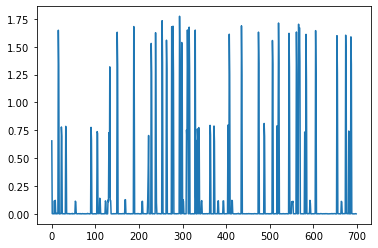

In [ ]:
sns.lineplot(x = [i for i in range(699)], y = psi_list)

In [ ]:
psi_list

[0.6554616446025187,
 0.00307836575997679,
 0.0016816819661602742,
 0.0017428896793646083,
 0.0018763501390288806,
 0.0015975776633448853,
 0.1187231136909347,
 0.0021978240511302135,
 0.12205671593718916,
 0.002081792025107919,
 0.001927601528525303,
 0.005609679946798963,
 0.0017932748837567538,
 0.002321044382126428,
 0.0029702382257913856,
 1.6473720101346967,
 1.3338092976223885,
 0.0003757204011596923,
 0.0006051267062459223,
 0.0024751673960933464,
 0.0017632389869012414,
 0.0019105321799705182,
 0.7799519214407544,
 0.6973027791410468,
 0.0023778842063447454,
 0.0013468578533110545,
 0.0012486121420377289,
 0.002303177703250898,
 0.0017057667486959297,
 0.0007595033755266891,
 0.0008007625724595911,
 0.001420934670916733,
 0.7855862722126412,
 0.6797232013303214,
 0.002874001460901058,
 0.002228300282938395,
 0.0019383228373762188,
 0.0027691890636620383,
 0.002571415406327669,
 0.002203110867574051,
 0.0035659049587503495,
 0.0006075222125100342,
 0.001016310522956398,
 0.0013

0.1187231136909347


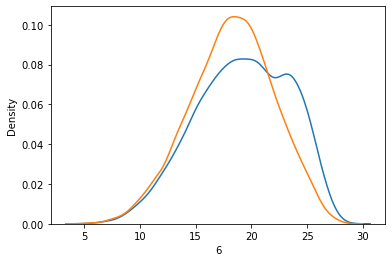

In [ ]:
sns.kdeplot(data_distribution.loc[6])
sns.kdeplot(data_distribution.loc[7])
print(psi_list[6])

0.0021978240511302135


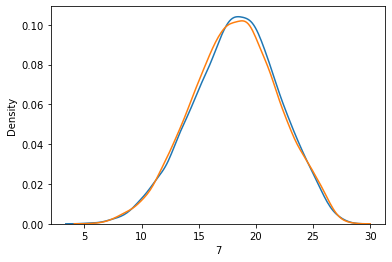

In [ ]:
sns.kdeplot(data_distribution.loc[7])
sns.kdeplot(data_distribution.loc[8])
print(psi_list[7])

0.12205671593718916


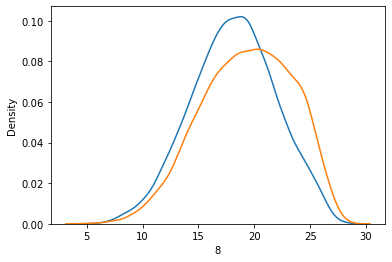

In [ ]:
sns.kdeplot(data_distribution.loc[8])
sns.kdeplot(data_distribution.loc[9])
print(psi_list[8])